In [28]:
# Import of Packages
import numpy as np
import pandas as pd
import statistics as st
import time

# Import of Packages for Functions
import math
import matplotlib.pyplot as plt
import sys

# Importing the Functions File
import Functions_VT2 as fn

from scipy.optimize import minimize

In [29]:
import numpy as np
from scipy.optimize import minimize

# Definition of Arrays and Parameters
K_rounded = np.array(
    [25, 25, 25, 25, 30, 30, 30, 30, 30, 40, 40, 40, 40, 40, 50, 50, 50, 50, 50, 50]
)
D_rounded = np.array(
    [
        25.878656,
        26.065349,
        26.381275,
        25.868576,
        28.391677,
        25.920765,
        29.941274,
        29.896383,
        31.786447,
        32.697431,
        37.153364,
        34.399326,
        35.235241,
        35.962368,
        40.090606,
        39.249995,
        40.555893,
        40.221385,
        42.081464,
        45.433294,
    ]
)
r_D = 1  # Revenues per Unit of Demand per period
r_K = 0.03  # Revenues per Unit of Capacity per period
r_rent_K = 1  # Rental Costs per Unit of Capacity per period
co_K = 0.5  # Operational costs per unit of capacity per period
co_D = 0.5  # Operational cost per unit of demand per period
ci_K = 10  # Installation cost per unit of capacity
discount = 0.05  # Discounted cash flow rate
Fth = 20  # Forecast Horizon
dt = 1  # Step time
pc = 0.1  # Penalty cost


# NPV Function Definition
def NPV(D, K, r_K, r_D, co_K, co_D, ci_K, discount):
    t = np.arange(0, Fth, dt)
    diff = K - D
    Revenue = K * r_K + D * r_D
    Cost = K * co_K + D * co_D + ci_K * 0 + pc * diff
    Profit = Revenue - Cost
    Discount = 1 / ((1 - discount) ** t)
    NPV = np.sum(Profit * Discount)
    return -NPV  # We use negative NPV to maximize


# Constraint Function K <= K_max
def constraint(K):
    return K_max - K


# Constraint Function K -> int
def integer_constraint(K):
    return K - np.round(K)


K_max = 50

# Define bounds for K (with integer constraint)
bounds = [(25, K_max)]

# Define constraints for K
constraints = [
    {"type": "ineq", "fun": constraint},
    {"type": "eq", "fun": integer_constraint},
]

# Perform optimization and store results for each time period
results = []
K_guess = 25  # Initial guess for the first time period

for i in range(Fth):
    result = minimize(
        NPV,
        K_guess,
        args=(D_rounded[i], r_K, r_D, co_K, co_D, ci_K, discount),
        bounds=bounds,
        constraints=constraints,
    )
    results.append(result)
    K_guess = result.x[0]  # Update initial guess for the next time period

# Extract optimized values of K from results
optimal_K_values = [result.x[0] for result in results]

# Print results for each time period
# for i, result in enumerate(results):
#     print(f"Time Period {i+1}:")
#     print("Maximized NPV:", -result.fun)
#     print("Optimal K:", result.x[0])

print(result)
print(optimal_K_values)

# Calculate NPV for the entire forecast horizon using the optimal capacity vector
Demo = NPV(
    D_rounded,
    np.array(optimal_K_values),
    r_K,
    r_D,
    co_K,
    co_D,
    ci_K,
    discount,
)
print("Demo NPV:", Demo)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 370.5047188526264
       x: [ 2.500e+01]
     nit: 1
     jac: [-2.040e+01]
    nfev: 2
    njev: 1
[25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0]
Demo NPV: -237.77824037552966


In [30]:
t = np.arange(0, Fth, dt)
# # result for Comparison
# NPV_result = NPV(D_rounded, K_rounded, r_K, r_D, co_K, co_D, ci_K, discount)
# print(NPV_result)

step = np.arange(20, 50, 5)
NPV_calcs = []
for time in step:
    NPV_result = NPV(D_rounded, time, r_K, r_D, co_K, co_D, ci_K, discount)
    NPV_calcs.append(NPV_result)

print(step)
print(NPV_calcs)

[20 25 30 35 40 45]
[-334.68019699403516, -237.77824037552966, -140.87628375702417, -43.97432713851873, 52.92762947998656, 149.829586098492]


In [31]:
# K_test = np.array(
#     [
#         26.0,
#         26.0,
#         27.0,
#         27.0,
#         28.0,
#         28.0,
#         29.0,
#         29.0,
#         31.0,
#         32.0,
#         33.0,
#         36.0,
#         37.0,
#         38.0,
#         40.0,
#         42.0,
#         42.0,
#         45.0,
#         45.0,
#         45.0,
#     ]
# )

# K_test = np.array(
#     [
#         40.0,
#         40.0,
#         40.0,
#         40.0,
#         40.0,
#         40.0,
#         40.0,
#         40.0,
#         40.0,
#         40.0,
#         40.0,
#         40.0,
#         40.0,
#         40.0,
#         40.0,
#         40.0,
#         40.0,
#         40.0,
#         40.0,
#         40.0,
#     ]
# )

K_test = np.array(
    [
        25.0,
        25.0,
        25.0,
        25.0,
        25.0,
        25.0,
        25.0,
        25.0,
        25.0,
        25.0,
        25.0,
        25.0,
        25.0,
        25.0,
        25.0,
        25.0,
        25.0,
        25.0,
        25.0,
        25.0,
    ]
)

NPV(D_rounded, K_test, r_K, r_D, co_K, co_D, ci_K, discount)

-237.77824037552966

In [32]:
# def constraint(K):
#     return K_max - K


# K_max = 40

# # Define bounds for K
# bounds = [(0, K_max)]

# # Define constraints for K
# constraints = {"type": "ineq", "fun": constraint}

# maximized_NPVs = []

# for j in D_rounded:
#     NPV_values = []
#     optimal_K_values = []
#     for i in K_rounded:
#         # Perform optimization
#         result = minimize(
#             NPV,
#             K_rounded,
#             args=(D_rounded, r_K, r_D, co_K, co_D, ci_K, discount),
#             bounds=bounds,
#             constraints=constraints,
#         )
#         NPV_value = -result.fun
#         optimal_K = result.x[0]  # Extract the optimal K value
#         NPV_values.append(NPV_value)
#         optimal_K_values.append(optimal_K)
#     maximized_NPVs.append((NPV_value, optimal_K_values))


# print("Maximized NPV:", -result.fun)
# print("Optimal K:", result.x)

__________________________________________________ 0.0% GA is running...

 The best solution found:                                                                           
 [25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25.
 25. 25.]

 Objective function:
 -237.77824037552966


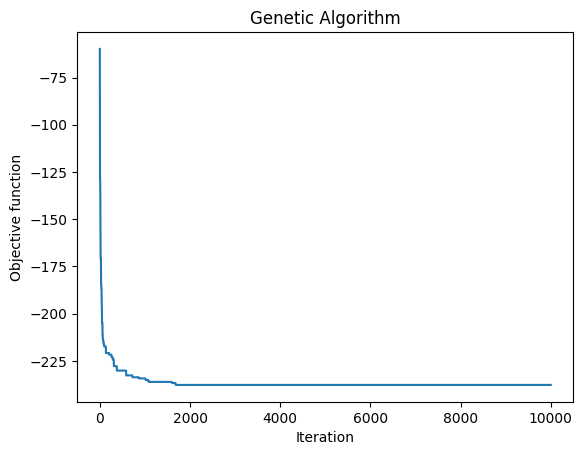

Optimized K vector: [25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25.
 25. 25.]


In [33]:
# import numpy as np
# from geneticalgorithm import geneticalgorithm as ga


# # Objective function (NPV)
# def NPV(K):
#     t = np.arange(0, Fth, dt)
#     diff = K - D_rounded
#     Revenue = K * r_K + D_rounded * r_D
#     Cost = K * co_K + D_rounded * co_D + ci_K * 0 + pc * diff
#     Profit = Revenue - Cost
#     Discount = 1 / ((1 - discount) ** t)
#     NPV = np.sum(Profit * Discount)
#     return -NPV  # We use negative NPV to maximize


# # Define constraints
# def integer_constraint(K):
#     return K - np.round(K)


# def lower_bound_constraint(K):
#     return K - 25


# def upper_bound_constraint(K):
#     return 50 - K


# # Define bounds for K
# bounds = np.array([(25, 50)] * Fth)  # Assuming Fth is the length of the vector

# # Define other parameters
# D_rounded = np.array(
#     [
#         25.878656,
#         26.065349,
#         26.381275,
#         25.868576,
#         28.391677,
#         25.920765,
#         29.941274,
#         29.896383,
#         31.786447,
#         32.697431,
#         37.153364,
#         34.399326,
#         35.235241,
#         35.962368,
#         40.090606,
#         39.249995,
#         40.555893,
#         40.221385,
#         42.081464,
#         45.433294,
#     ]
# )
# r_K = 0.03
# r_D = 1
# co_K = 0.5
# co_D = 0.5
# ci_K = 10
# discount = 0.05
# Fth = 20
# dt = 1
# pc = 0.1

# # Create an instance of the genetic algorithm
# ga_model = ga(
#     function=NPV, dimension=Fth, variable_type="int", variable_boundaries=bounds
# )

# # Add constraints
# ga_model.constraints = [
#     {"type": "eq", "fun": integer_constraint},
#     {"type": "ineq", "fun": lower_bound_constraint},
#     {"type": "ineq", "fun": upper_bound_constraint},
# ]

# # Run the optimization
# ga_model.run()

# # Get the optimized solution
# optimized_K = ga_model.output_dict["variable"]

# print("Optimized K vector:", optimized_K)

 The best solution found:                                                                           
 [50. 26. 27. 26. 29. 26. 30. 30. 32. 33. 37. 35. 36. 36. 40. 40. 41. 41.
 42. 25.]

 Objective function:
 -462.2669296284475


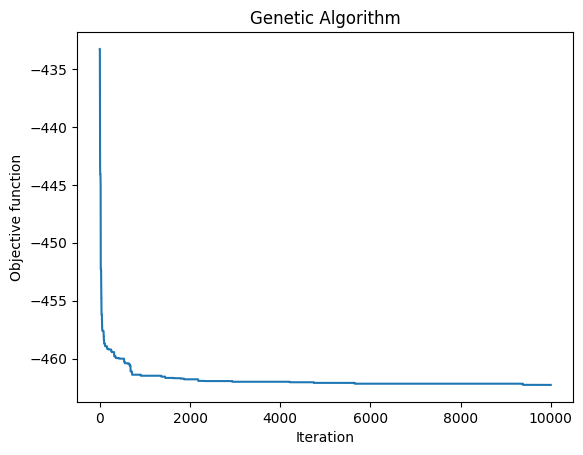

Optimized K vector: [50. 26. 27. 26. 29. 26. 30. 30. 32. 33. 37. 35. 36. 36. 40. 40. 41. 41.
 42. 25.]


In [34]:
# import numpy as np
# from geneticalgorithm import geneticalgorithm as ga


# # Objective function (NPV)
# def NPV(K):
#     t = np.arange(0, Fth, dt)
#     # Creation of a Capacity Change Vector
#     delta_K0 = np.diff(K)
#     # Setting the initial Value of the Change Vector to Zero
#     delta_K = np.insert(delta_K0, 0, 0)

#     diff = K - D_rounded
#     Revenue = K * r_K + D_rounded * r_D
#     Cost = K * co_K + D_rounded * co_D + ci_K * delta_K + pc * abs(diff)
#     Profit = Revenue - Cost
#     Discount = 1 / ((1 - discount) ** t)
#     NPV = np.sum(Profit * Discount)
#     return -NPV  # We use negative NPV to maximize


# # Define constraints
# def integer_constraint(K):
#     return K - np.round(K)


# def lower_bound_constraint(K):
#     return K - 25


# def upper_bound_constraint(K):
#     return 50 - K


# def distinct_values_constraint(K):
#     return np.unique(K).size - K.size


# # Define bounds for K
# bounds = np.array([(25, 50)] * Fth)  # Assuming Fth is the length of the vector

# # Define other parameters
# D_rounded = np.array(
#     [
#         25.878656,
#         26.065349,
#         26.381275,
#         25.868576,
#         28.391677,
#         25.920765,
#         29.941274,
#         29.896383,
#         31.786447,
#         32.697431,
#         37.153364,
#         34.399326,
#         35.235241,
#         35.962368,
#         40.090606,
#         39.249995,
#         40.555893,
#         40.221385,
#         42.081464,
#         45.433294,
#     ]
# )
# r_K = 0.03
# r_D = 1
# co_K = 0.5
# co_D = 0.5
# ci_K = 10
# discount = 0.05
# Fth = 20
# dt = 1
# pc = 0.1

# # Create an instance of the genetic algorithm
# ga_model = ga(
#     function=NPV, dimension=Fth, variable_type="int", variable_boundaries=bounds
# )

# # Add constraints
# ga_model.constraints = [
#     {"type": "eq", "fun": integer_constraint},
#     {"type": "ineq", "fun": lower_bound_constraint},
#     {"type": "ineq", "fun": upper_bound_constraint},
#     {"type": "ineq", "fun": distinct_values_constraint},
# ]

# # Run the optimization
# ga_model.run()

# # Get the optimized solution
# optimized_K = ga_model.output_dict["variable"]

# print("Optimized K vector:", optimized_K)

 The best solution found:                                                                           
 [50. 26. 27. 26. 29. 26. 30. 31. 32. 33. 37. 35. 36. 36. 40. 40. 41. 40.
 42. 25.]

 Objective function:
 -462.20295727952254


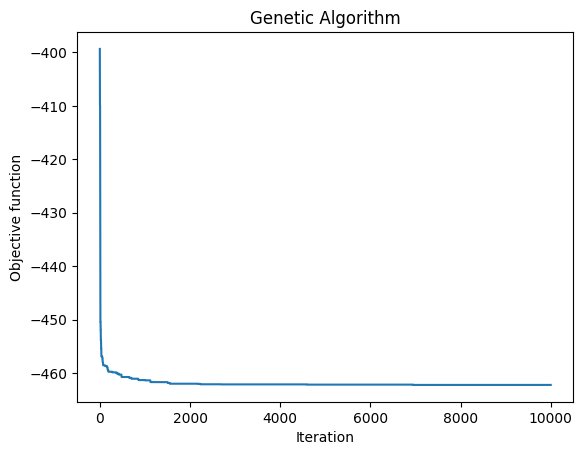

Optimized K vector: [50. 26. 27. 26. 29. 26. 30. 31. 32. 33. 37. 35. 36. 36. 40. 40. 41. 40.
 42. 25.]


In [36]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga


# Objective function (NPV)
def NPV(K):
    t = np.arange(0, Fth, dt)
    delta_K0 = np.diff(K)
    delta_K = np.insert(delta_K0, 0, 0)
    diff = K - D_rounded
    Revenue = K * r_K + D_rounded * r_D
    Cost = K * co_K + D_rounded * co_D + ci_K * delta_K + pc * abs(diff)
    Profit = Revenue - Cost
    Discount = 1 / ((1 - discount) ** t)
    NPV = np.sum(Profit * Discount)
    return -NPV  # We use negative NPV to maximize


# Define constraints
def integer_constraint(K):
    return K - np.round(K)


def lower_bound_constraint(K):
    return K - 25


def upper_bound_constraint(K):
    return 50 - K


def distinct_values_constraint(K):
    return np.unique(K).size - K.size


def first_entry_constraint(K):
    return K[0] - 25


def increasing_values_constraint(K):
    return np.diff(
        K
    )  # Ensure differences between consecutive elements are non-negative


# Define bounds for K
bounds = np.array([(25, 50)] * Fth)

# Create an instance of the genetic algorithm
ga_model = ga(
    function=NPV, dimension=Fth, variable_type="int", variable_boundaries=bounds
)

# Add constraints
ga_model.constraints = [
    {"type": "eq", "fun": integer_constraint},
    {"type": "ineq", "fun": lower_bound_constraint},
    {"type": "ineq", "fun": upper_bound_constraint},
    {"type": "ineq", "fun": distinct_values_constraint},
    {"type": "eq", "fun": first_entry_constraint},
    {"type": "ineq", "fun": increasing_values_constraint},
]

# Run the optimization
ga_model.run()

# Get the optimized solution
optimized_K = ga_model.output_dict["variable"]

print("Optimized K vector:", optimized_K)